# Hypothesis Test GP

## Outline

- **Prepare data**    
- **Calculate 90% confidence interval for average price of car. Use sample of 250, 500, 1000**
- **Create three different subsets according to `category` and compare `price` across the three subsets**
- **Perform a two-tailed t-test on `price` according to `category`**
- **Perform a one-tailed t-test on `price` according to `category`**

### Level Up
- **Calculate 80% bootstrapped confidence interval**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

## Prepare Data

The csv file we want is stored in the `data` folder as `car_price.csv`. Read the file into a DataFrame, display the first five rows, and check the type of each column.

Filter the DataFrame to meet the following criteria:
- Cars were produced between 2000 and 2016
- The `category` of vehicle belongs to the set `{"Jeep", "Hatchback", "Sedan"}`

In [2]:
# Your code here
df = pd.read_csv("./data/car_price.csv")
df.head()

,id,price,levy,manufacturer,model,prod._year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
df.shape

(17377, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17377 entries, 0 to 17376
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                17377 non-null  int64  
 1   price             17377 non-null  int64  
 2   levy              17377 non-null  object 
 3   manufacturer      17377 non-null  object 
 4   model             17377 non-null  object 
 5   prod._year        17377 non-null  int64  
 6   category          17377 non-null  object 
 7   leather_interior  17377 non-null  object 
 8   fuel_type         17377 non-null  object 
 9   engine_volume     17377 non-null  object 
 10  mileage           17377 non-null  object 
 11  cylinders         17377 non-null  float64
 12  gear_box_type     17377 non-null  object 
 13  drive_wheels      17377 non-null  object 
 14  doors             17377 non-null  object 
 15  wheel             17377 non-null  object 
 16  color             17377 non-null  object

In [11]:
# Filter df for cars between 2000 and 2016
df = df.loc[(df['prod._year'] >= 2000) & (df['prod._year'] <= 2016)]

In [12]:
df['category'].unique()

array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
       'Universal', 'Coupe', 'Minivan', 'Cabriolet', 'Pickup',
       'Limousine'], dtype=object)

In [20]:
# Filter category to include {"Jeep", "Hatchback", "Sedan"}
df = df.loc[df['category'].isin({"Jeep", "Hatchback", "Sedan"})]

In [21]:
df.shape

(13378, 18)

## Confidence Interval

Calculate a 90% confidence interval around the mean `price` using the following sample sizes:
- 250
- 500
- 1000

Compare the range values for each sample size

**Note**: Need to set `random_state` when taking sample or sample will be different each time. Also why Bootstrap CI is more robust.

In [46]:
sample_250 = df['price'].sample(n=250, random_state=42)

In [47]:
# Sample mean
sample_mean = sample_250.mean()

# Sample Standard Deviation
sample_std = sample_250.std()

# Sample Standard Error
se = stats.sem(sample_250)

# Sample Size
sample_size = len(sample_250)

**alpha** in `stats.t.interval` is refering to the **confidence level**, not actual alpha value

ex. for 95% confidence interval, alpha=.95, not .05

In [48]:
stats.t.interval(.9, loc=sample_mean, scale=se, df=sample_size-1)

(13591.830821984751, 16009.633178015249)

With a sample size of 250, we are 90% confident that the true mean of price falls within 13,591 and 16,009

In [49]:
def calculate_ci(sample, confidence_level):
    
    # Sample mean
    sample_mean = sample.mean()

    # Sample Standard Deviation
    sample_std = sample.std()

    # Sample Standard Error
    se = stats.sem(sample)

    # Sample Size
    sample_size = len(sample)
    
    # Calculate and return confidence interval
    return stats.t.interval(confidence_level, loc=sample_mean, scale=se, df=sample_size-1)

In [69]:
# Sample of 500
sample_500 = df['price'].sample(n=500, random_state=42)

In [68]:
calculate_ci(sample_500, .9)

(13871.715451379716, 15504.120548620283)

With a sample size of 500, we are 90% confident that the true mean of price falls within 13,871 and 15,504

In [52]:
# Sample of 1000
sample_1000 = df['price'].sample(n=1000, random_state=42)

In [54]:
calculate_ci(sample_1000, .9)

(14315.639858690143, 15510.222141309858)

With a sample size of 1000, we are 90% confident that the true mean of price falls within 14,315 and 15,510

## Create three different subsets for `category`

In [70]:
# Your code here
df['category'].value_counts()

Sedan        6976
Jeep         4018
Hatchback    2384
Name: category, dtype: int64

In [83]:
# Create subset with only Sedan category
df_sedan = df.loc[df['category'] == "Sedan", "price"]

In [85]:
df_jeep = df.loc[df['category'] == "Jeep", "price"]

In [87]:
df_hatchback = df.loc[df['category'] == "Hatchback", "price"]

## Compare `price` across three subsets

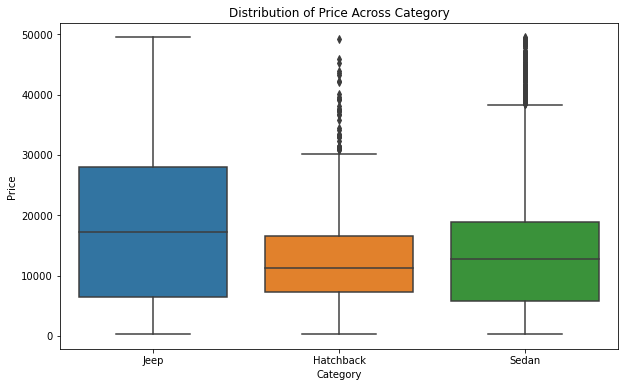

In [88]:
# Your code here
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=df, x='category', y='price', ax=ax)

ax.set_title('Distribution of Price Across Category')
ax.set_xlabel('Category')
ax.set_ylabel('Price');

- Median price of Jeep is highest, followed by Sedan then Hatchback.
- Outliers in Sedan and Hatchback
- Jeep has larger spread/variance than Hatchback or Sedan.

In [89]:
df.groupby('category')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Hatchback,2384.0,12079.050755,7371.461796,314.0,7213.0,11290.0,16621.0,49174.0
Jeep,4018.0,18479.090841,13704.074217,314.0,6429.0,17249.0,28059.0,49459.0
Sedan,6976.0,13378.490109,9573.639952,314.0,5802.0,12720.0,18817.0,49459.0


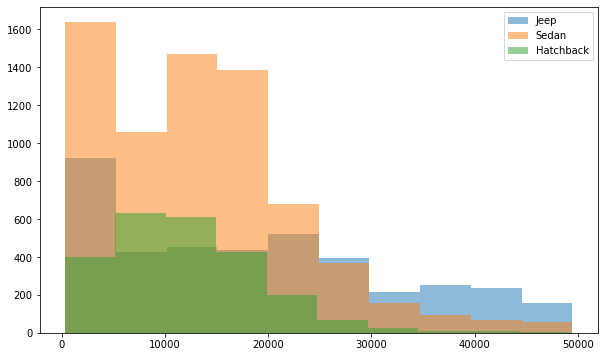

In [104]:
fig, ax = plt.subplots(figsize=(10,6))

ax.hist(df_jeep, label='Jeep', alpha=.5)
ax.hist(df_sedan, label='Sedan', alpha=.5)
ax.hist(df_hatchback, label='Hatchback', alpha=.5)

# ax.axvline(df_jeep.mean(), color='b')
# ax.axvline(df_sedan.mean(), color='orange')
# ax.axvline(df_hatchback.mean(), color='g')

ax.legend();

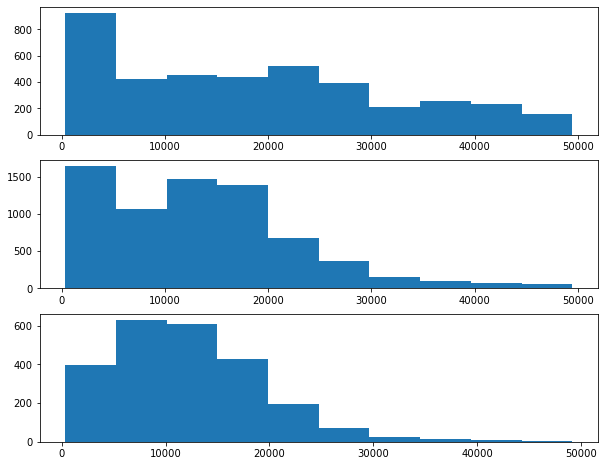

In [101]:
fig, ax = plt.subplots(figsize=(10,8), nrows=3)

ax[0].hist(df_jeep, label='Jeep')
ax[1].hist(df_sedan, label='Sedan')
ax[2].hist(df_hatchback, label='Hatchback');

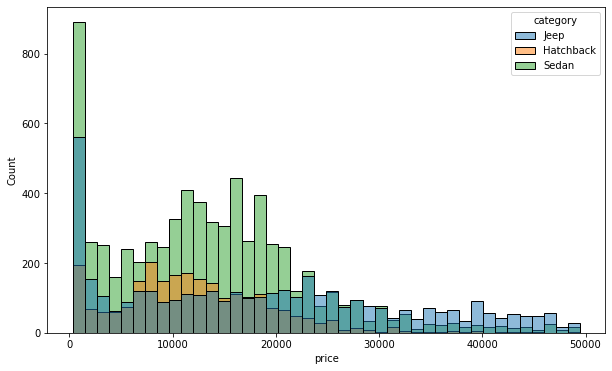

In [105]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(data=df, x='price', hue='category', ax=ax);

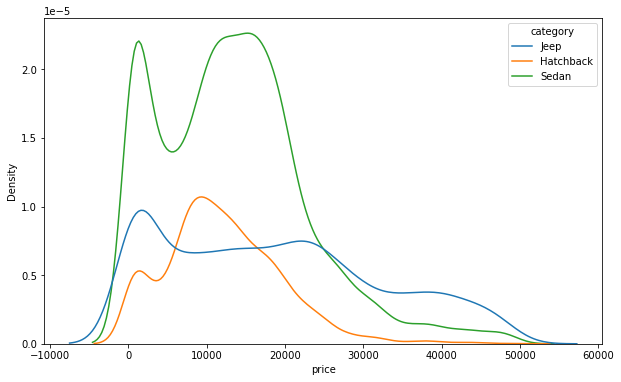

In [106]:
fig, ax = plt.subplots(figsize=(10,6))
sns.kdeplot(data=df, x='price', hue='category', ax=ax);

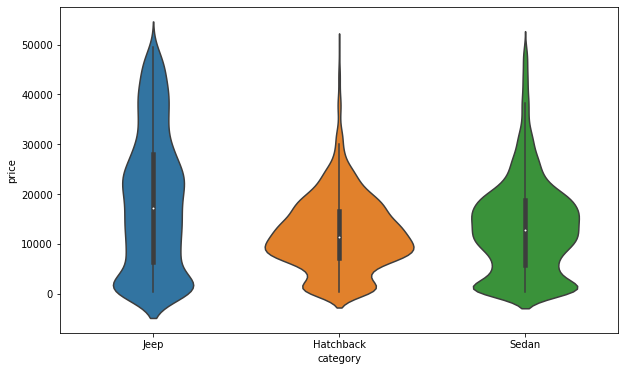

In [107]:
fig, ax = plt.subplots(figsize=(10,6))
sns.violinplot(data=df, x='category', y='price');

## Hypothesis Testing

The output of a t-test in the scipy stats library (so, `ttest_1samp`, `ttest_rel`, `ttest_ind`, etc) is a tuple with two pieces:
- the test statistic
- the p-value

I recommend you use the `alternative` argument in the t-test functions to tell it what kind of test you're running: 
- `'two-sided'` tells the stats library you're running a two-tailed test
- `'less'` tells the stats library you're running a left tailed test
- `'greater'` tells the stats library you're running a right tailed test

### Complete the following for each example below:
- Define the null and alternative hypothesis
- Identify the appropriate type of test to use (use alpha of .05)
- State what a Type I and Type II error would be in this context
- Take a sample of 250 from each population
- Run the test and interpret the results


### Perform a two-tailed t-test on `price` according to `category`

The hardest part is setting it up!

- Null: There is no significant difference between the average price of a Jeep and the average price of a Sedan.
- Alternative: There is a significant difference between the average price of a Jeep and the average price of a Sedan.

- Type I: Come to the conclusion that average price of a Sedan is different than average price of a Jeep, when they are in fact the same (false positive).
- Type II: Come to the conclusion that average price of a Sedan is the same as the average price of a Jeep, when they are in fact different (false negative).

- Test Type: We will run a two-sample independent t-test.

In [109]:
# Your code here
jeep_sample = df_jeep.sample(n=250, random_state=42)
sedan_sample = df_sedan.sample(n=250, random_state=42)

In [110]:
print("Variance of Sedan sample: ", sedan_sample.var())
print("Variance of Jeep sample: ", jeep_sample.var())

Variance of Sedan sample:  102840711.43235345
Variance of Jeep sample:  196295569.33476296


In [112]:
results = stats.ttest_ind(jeep_sample, sedan_sample, equal_var=False, alternative='two-sided')
results

Ttest_indResult(statistic=6.059372571849608, pvalue=2.8740938287879912e-09)

In [113]:
p_val = results[1]
print('P value of t test: ', p_val)

P value of t test:  2.8740938287879912e-09


Using an alpha (significance level) of .05, we can reject the null hypothesis because the p-value is lower

### Perform a one-tailed t-test on `price` according to `category`

- Null: The average price of a Sedan is less than or equal to the average price of a Hatchback.
- Alternative: The average price of a Sedan is greater than the average price of a Hatchback.

- Type I: Saying the average price of a Sedan is greater than the Hatchback when it is actually less than or equal to it (false positive).
- Type II: The average price of Sedan is less than or equal to the Hatchback when it is actually greater than (false negative).

- Test Type: We will run two sample independent t-test

- Null: A <= B
- Alternative: A > B

In [114]:
# Your code here
hatchback_sample = df_hatchback.sample(n=250, random_state=42)

In [125]:
print("Variance of Sedan sample: ", sedan_sample.var())
print("Variance of Hatchback sample: ", hatchback_sample.var())

Variance of Sedan sample:  102840711.43235345
Variance of Hatchback sample:  56327898.591823295


In [115]:
results = stats.ttest_ind(a=sedan_sample, b=hatchback_sample,
                          equal_var=False, alternative='greater')
results

Ttest_indResult(statistic=1.07402906245868, pvalue=0.14168708356013984)

In [116]:
print('P value of one tail t test: ', results[1])

P value of one tail t test:  0.14168708356013984


We fail to reject the null hypothesis because the p-value of .14 is greater than are our defined alpha value of .05.

# Level Up

## Calculate 80% bootstrapped confidence interval around mean Sedan price

- Take a sample of 1000 from Sedan population
- Take a bootstrap sample from our original sample with n=1000
- Calculate the mean of the bootstrap sample
- Repeat this process 10,000 times storing the mean of each bootstrap sample in a list.
- Plot a distribution of the bootstrap sample means to ensure it reflects a normal distribution
- Take an 80% confidence interval of the bootstrap sample means

**HELPFUL HINT:** For an x% confidence interval, trim [(1 – [x/100]) / 2]%

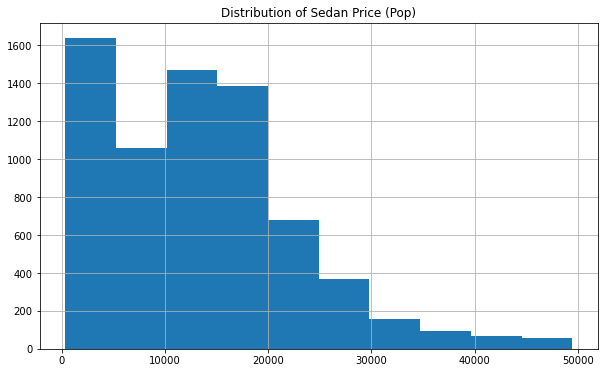

In [118]:
# Your code here
df_sedan.hist(figsize=(10,6)).set(title='Distribution of Sedan Price (Pop)');

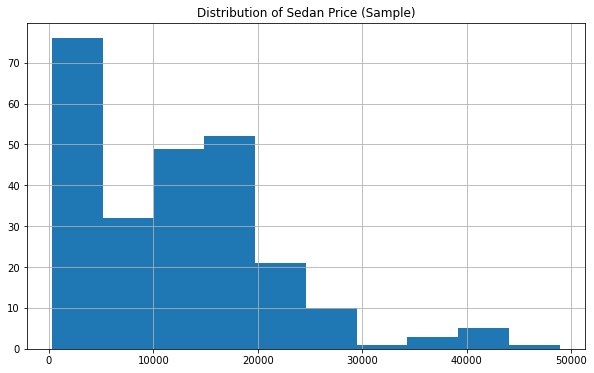

In [120]:
main_sample = df_sedan.sample(n=250)
main_sample.hist(figsize=(10,6)).set(title='Distribution of Sedan Price (Sample)');

In [121]:
bootstrap_means = []
for _ in range(10000):
    bt_sample = main_sample.sample(n=250, replace=True)
    bt_mean = bt_sample.mean()
    bootstrap_means.append(bt_mean)

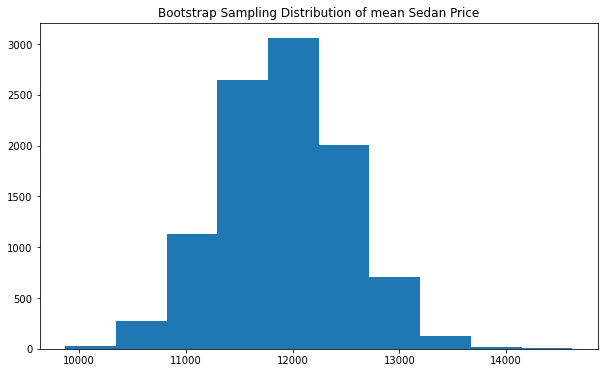

In [122]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(bootstrap_means)
ax.set_title('Bootstrap Sampling Distribution of mean Sedan Price');

In [124]:
df_sedan.mean()

13378.490108944954

For an x% confidence interval, trim [(1 – [x/100]) / 2]%

In [126]:
np.percentile(sorted(bootstrap_means), [10, 90])

array([11168.39  , 12668.3472])